In [30]:
import pandas as pd
df = pd.read_csv('dados/MICRODADOS_ENEM_2022 copy 2.csv', sep=';', encoding='latin1', decimal=',', nrows=1000)
df.head()

#nrows para ler menos dados na hora dos testes = não demorar muito para carregar

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210057943671,2022,14,M,2,2,1,1,2,1,...,B,A,A,A,A,A,A,A,A,A
1,210057516120,2022,14,M,2,1,1,1,16,1,...,E,E,B,E,B,B,E,B,E,B
2,210057280536,2022,5,F,1,2,1,1,2,1,...,A,A,A,A,A,A,C,A,A,B
3,210055724397,2022,6,M,1,3,1,1,2,1,...,B,A,A,C,A,A,C,B,B,B
4,210055097896,2022,4,M,0,3,1,1,1,1,...,A,A,A,A,A,A,B,A,A,A


In [31]:
df.columns

Index(['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'CO_MUNICIPIO_PROVA', 'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA',
       'SG_UF_PROVA', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC',
       'TX_RESPOSTAS_MT', 'TP_LINGUA', 'TX_GABARITO_CN', 'TX_GABARITO_CH',
       'TX_GABARITO_LC', 'TX_GABARITO_MT', 'TP_STATUS_REDACAO',
       'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4',
       'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004',

In [32]:
df = df.drop(columns=['IN_TREINEIRO'])


In [33]:
df.columns

Index(['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'CO_MUNICIPIO_ESC',
       'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC',
       'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC', 'CO_MUNICIPIO_PROVA',
       'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA', 'SG_UF_PROVA', 'TP_PRESENCA_CN',
       'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT', 'CO_PROVA_CN',
       'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH',
       'NU_NOTA_LC', 'NU_NOTA_MT', 'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH',
       'TX_RESPOSTAS_LC', 'TX_RESPOSTAS_MT', 'TP_LINGUA', 'TX_GABARITO_CN',
       'TX_GABARITO_CH', 'TX_GABARITO_LC', 'TX_GABARITO_MT',
       'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3',
       'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002',
       'Q003', 'Q004', 'Q005', 'Q006',

In [34]:
prova_columns = ['TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC','TP_PRESENCA_MT']
condition = ~df[prova_columns].isin([0, 2]).any(axis=1)
df= df[condition]

In [35]:
df['TP_PRESENCA_CH'].unique()

array([1])

In [36]:
redacao_columns = ['TP_STATUS_REDACAO']
condition = ~df[redacao_columns].isin([2,3,4,5,6,7,8,9]).any(axis=1)
df= df[condition]

In [37]:
df['TP_STATUS_REDACAO'].unique()

array([1.])

In [38]:
print(df['Q006'].unique())

['B' 'A' 'E' 'C' 'G' 'D' 'F' 'I' 'H' 'K' 'L' 'J' 'Q' 'P' 'O' 'M']


In [39]:
mean_data = df.groupby('Q006')[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT','NU_NOTA_REDACAO']].mean().reset_index()
mean_data

,Q006,NU_NOTA_REDACAO
0,A,545.263158
1,B,589.739130
2,C,614.214876
3,D,625.294118
4,E,693.181818
5,F,685.000000
6,G,678.947368
7,H,730.588235
8,I,680.000000
9,J,900.000000


In [40]:
print(mean_data.columns)


Index(['Q006', 'NU_NOTA_REDACAO'], dtype='object')


In [41]:
df_notas_renda = df[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'Q006','NU_NOTA_REDACAO']]

mean_data = df_notas_renda.groupby('Q006').mean().reset_index()

melted_data = df_notas_renda.melt(id_vars='Q006', value_vars=['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT','NU_NOTA_REDACAO'], var_name='Prova', value_name='Nota')


In [42]:
df_notas_renda = df[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'Q006','NU_NOTA_REDACAO']]
df_notas_renda

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,Q006,NU_NOTA_REDACAO
2,421.1,546,498.8,565.3,B,760.0
3,490.7,388.6,357.8,416,A,320.0
7,398.1,427.3,400.2,404.9,B,440.0
9,467.5,461,466.7,435.3,B,360.0
11,458.7,539.8,488.2,456.8,B,940.0
...,...,...,...,...,...,...
991,448.3,428.2,390.5,415.5,B,620.0
995,400,537.4,500,493.9,B,700.0
996,443.9,544.9,529.7,484.4,C,640.0
997,561.4,573.7,579.1,600.4,C,600.0


In [43]:
melted_data = df_notas_renda.melt(id_vars='Q006', value_vars=['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT','NU_NOTA_REDACAO'], var_name='Prova', value_name='Nota')
melted_data

,Q006,Prova,Nota
0,B,NU_NOTA_CN,421.1
1,A,NU_NOTA_CN,490.7
2,B,NU_NOTA_CN,398.1
3,B,NU_NOTA_CN,467.5
4,B,NU_NOTA_CN,458.7
...,...,...,...
2940,B,NU_NOTA_REDACAO,620.0
2941,B,NU_NOTA_REDACAO,700.0
2942,C,NU_NOTA_REDACAO,640.0
2943,C,NU_NOTA_REDACAO,600.0


In [44]:
melted_data['Nota'] = melted_data['Nota'].astype(float)
melted_data


,Q006,Prova,Nota
0,B,NU_NOTA_CN,421.1
1,A,NU_NOTA_CN,490.7
2,B,NU_NOTA_CN,398.1
3,B,NU_NOTA_CN,467.5
4,B,NU_NOTA_CN,458.7
...,...,...,...
2940,B,NU_NOTA_REDACAO,620.0
2941,B,NU_NOTA_REDACAO,700.0
2942,C,NU_NOTA_REDACAO,640.0
2943,C,NU_NOTA_REDACAO,600.0


In [45]:
renda_mapping = {
    'A': 'Nenhuma Renda',
    'B': 'Até R$ 1.212,00',
    'C': 'De R$ 1.212,01 até R$ 1.818,00',
    'D': 'De R$ 1.818,01 até R$ 2.424,00',
    'E': 'De R$ 2.424,01 até R$ 3.030,00',
    'F': 'De R$ 3.030,01 até R$ 3.636,00',
    'G': 'De R$ 3.636,01 até R$ 4.848,00',
    'H': 'De R$ 4.848,01 até R$ 6.060,00',
    'I': 'De R$ 6.060,01 até R$ 7.272,00',
    'J': 'De R$ 7.272,01 até R$ 8.484,00',
    'K': 'De R$ 8.484,01 até R$ 9.696,00',
    'L': 'De R$ 9.696,01 até R$ 10.908,00',
    'M': 'De R$ 10.908,01 até R$ 12.120,00',
    'N': 'De R$ 12.120,01 até R$ 14.544,00',
    'O': 'De R$ 14.544,01 até R$ 18.180,00',
    'P': 'De R$ 18.180,01 até R$ 24.240,00',
    'Q': 'Acima de R$ 24.240,00.'
}

# Aplicar o mapeamento na coluna 'Q006' de 'melted_data'
melted_data['Q006'] = melted_data['Q006'].replace(renda_mapping)


In [46]:
prova_mapping = {
    'NU_NOTA_CN': 'Nota da prova de Ciências da Natureza',
    'NU_NOTA_CH': 'Nota da prova de Ciências Humanas',
    'NU_NOTA_LC': 'Nota da prova de Linguagens e Códigos',
    'NU_NOTA_MT': 'Nota da prova de Matemática',
    'NU_NOTA_REDACAO': 'Nota da prova de redação'
}

# Substitua os valores na coluna 'Prova'
melted_data['Prova'] = melted_data['Prova'].replace(prova_mapping)

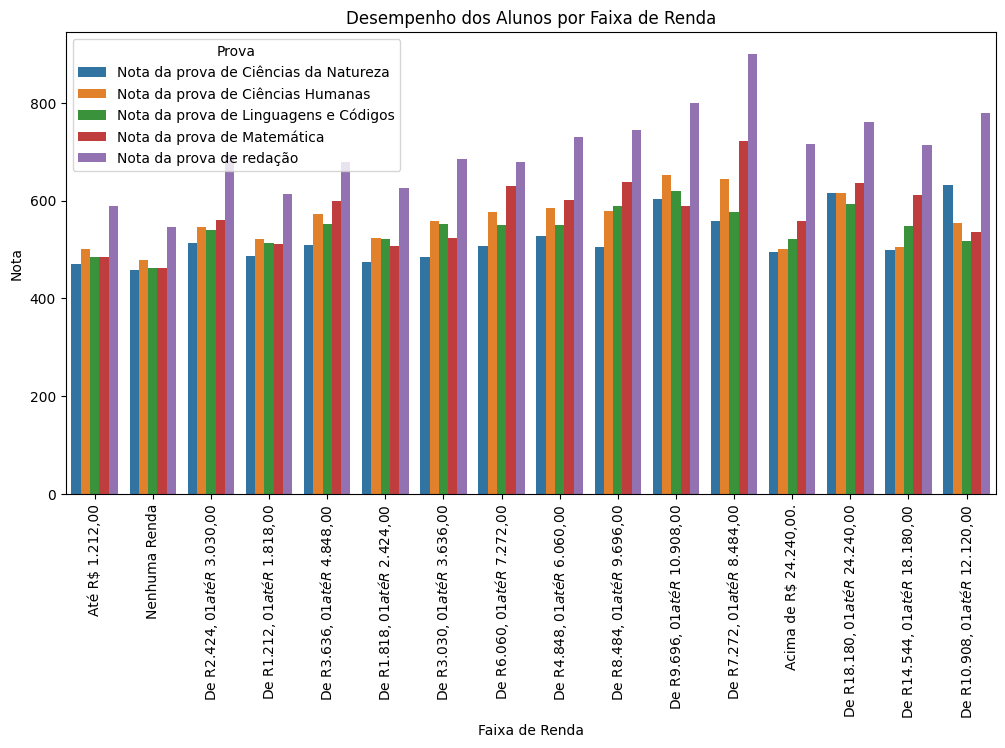

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
sns.barplot(x='Q006', y='Nota', hue='Prova', data=melted_data, ci=None)
plt.title('Desempenho dos Alunos por Faixa de Renda')
plt.xlabel('Faixa de Renda')
plt.ylabel('Nota')
plt.xticks(rotation=90)
plt.show() 

In [48]:
#Não vamos utilizar esse gráfico por isso não está em ordem crescente

In [49]:
df['NU_NOTA_CN'] = pd.to_numeric(df['NU_NOTA_CN'], errors='coerce')
df['NU_NOTA_CH'] = pd.to_numeric(df['NU_NOTA_CH'], errors='coerce')
df['NU_NOTA_LC'] = pd.to_numeric(df['NU_NOTA_CH'], errors='coerce')
df['NU_NOTA_MT'] = pd.to_numeric(df['NU_NOTA_CH'], errors='coerce')
df['NU_NOTA_REDACAO'] = pd.to_numeric(df['NU_NOTA_CH'], errors='coerce')

In [50]:
notas = df[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT','NU_NOTA_REDACAO']]

In [51]:
mean_values = df[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT','NU_NOTA_REDACAO']].mean().mean()
print(mean_values)

509.8051612903226


In [52]:
sigma = df[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT','NU_NOTA_REDACAO']].std().mean()
sigma

70.38340388083432

In [53]:
mean_data = df.groupby('Q006')[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT','NU_NOTA_REDACAO']].mean()
mean_data 

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
Q006,,,,,
A,457.628070,478.496491,478.496491,478.496491,478.496491
B,470.039565,500.633478,500.633478,500.633478,500.633478
C,485.904132,521.611570,521.611570,521.611570,521.611570
D,474.883824,523.402941,523.402941,523.402941,523.402941
E,512.615909,545.227273,545.227273,545.227273,545.227273
F,484.275000,557.433333,557.433333,557.433333,557.433333
G,510.331579,572.752632,572.752632,572.752632,572.752632
H,528.194118,584.182353,584.182353,584.182353,584.182353
I,507.275000,576.275000,576.275000,576.275000,576.275000


In [54]:
d_data = (mean_data - mean_values) / sigma
d_data

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
Q006,,,,,
A,-0.741327,-0.444830,-0.444830,-0.444830,-0.444830
B,-0.564985,-0.130310,-0.130310,-0.130310,-0.130310
C,-0.339583,0.167744,0.167744,0.167744,0.167744
D,-0.496159,0.193196,0.193196,0.193196,0.193196
E,0.039935,0.503274,0.503274,0.503274,0.503274
F,-0.362730,0.676696,0.676696,0.676696,0.676696
G,0.007479,0.894351,0.894351,0.894351,0.894351
H,0.261268,1.056743,1.056743,1.056743,1.056743
I,-0.035948,0.944396,0.944396,0.944396,0.944396


In [55]:
melted_data = d_data.reset_index().melt(id_vars='Q006', var_name='Prova', value_name='Coeficiente d')
melted_data 

,Q006,Prova,Coeficiente d
0,A,NU_NOTA_CN,-0.741327
1,B,NU_NOTA_CN,-0.564985
2,C,NU_NOTA_CN,-0.339583
3,D,NU_NOTA_CN,-0.496159
4,E,NU_NOTA_CN,0.039935
...,...,...,...
75,L,NU_NOTA_REDACAO,2.028814
76,M,NU_NOTA_REDACAO,0.632178
77,O,NU_NOTA_REDACAO,-0.065430
78,P,NU_NOTA_REDACAO,1.493887


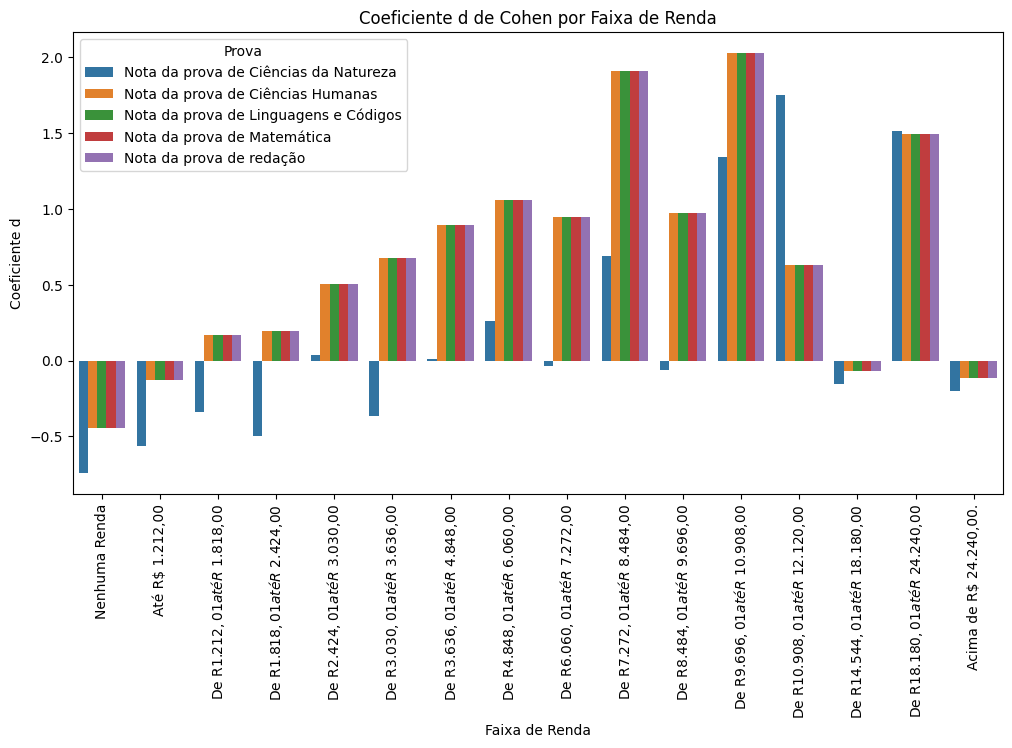

In [56]:
melted_data['Q006'] = melted_data['Q006'].replace(renda_mapping)
melted_data['Prova'] = melted_data['Prova'].replace(prova_mapping)
plt.figure(figsize=(12, 6))
sns.barplot(x='Q006', y='Coeficiente d', hue='Prova', data=melted_data)
plt.title('Coeficiente d de Cohen por Faixa de Renda')
plt.xlabel('Faixa de Renda')
plt.ylabel('Coeficiente d')
plt.xticks(rotation=90)
plt.show()